# Data Preparation

In [1]:
suppressMessages(library(CausalImpact))
suppressMessages(library(dplyr))

In [2]:
df <- read.csv("dataset//20180916-bukalapak-campaign.csv")

# Analysis

## Causal Impact

We'll use Tokopedia search query data as reference point; considering that it is highly correlated to Bukalapak's (0.96).

### First campaign

In [25]:
pre.period <- as.Date(c('2015-01-01','2016-12-01'))
post.period <- as.Date(c('2017-01-01','2017-06-01'))

In [20]:
time.points <- as.Date(df$Month)
data <- zoo(cbind(df$observed_bukalapak, df$observed_tokopedia), time.points)
# data <- zoo(cbind(subset(df, !is.na(residual_bukalapak))$residual_bukalapak,
#                   subset(df, !is.na(residual_tokopedia))$residual_tokopedia), time.points)

In [21]:
ci <- CausalImpact(data = data,
                   pre.period = pre.period,
                   post.period = post.period
                  )

Warning message:
“Removed 93 rows containing missing values (geom_path).”Warning message:
“Removed 76 rows containing missing values (geom_path).”Warning message:
“Removed 186 rows containing missing values (geom_path).”

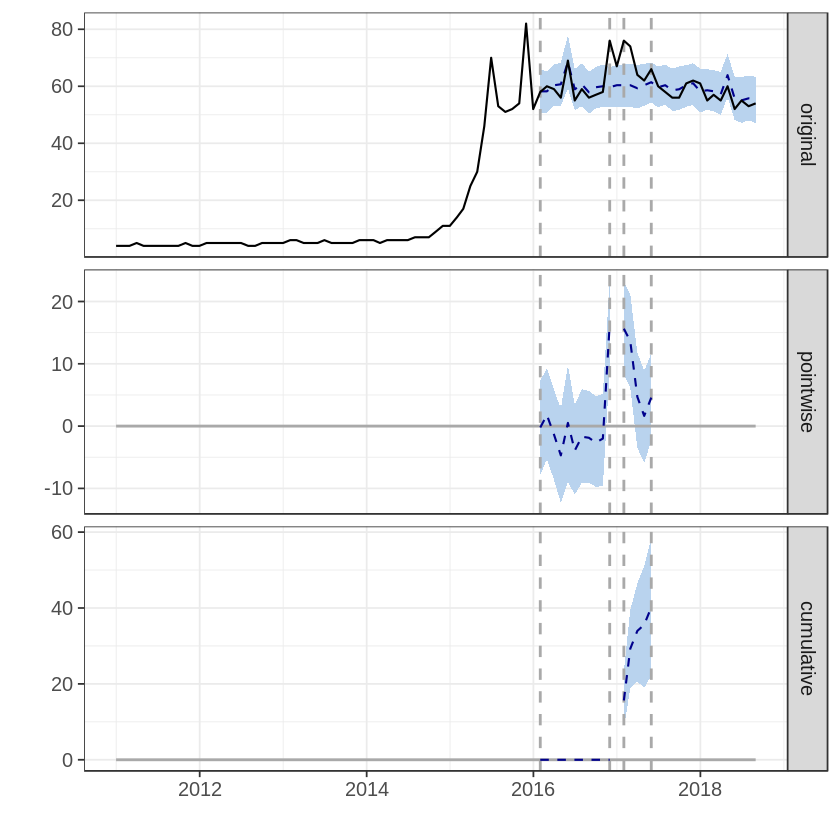

In [22]:
plot(ci)

In [23]:
summary(ci)

Posterior inference {CausalImpact}

                         Average       Cumulative 
Actual                   68            342        
Prediction (s.d.)        60 (1,9)      302 (9,5)  
95% CI                   [57, 64]      [283, 320] 
                                                  
Absolute effect (s.d.)   8 (1,9)       40 (9,5)   
95% CI                   [4,4, 12]     [22,2, 59] 
                                                  
Relative effect (s.d.)   13% (3,2%)    13% (3,2%) 
95% CI                   [7,4%, 19%]   [7,4%, 19%]

Posterior tail-area probability p:   0,001
Posterior prob. of a causal effect:  99,8999%

For more details, type: summary(impact, "report")



In [24]:
summary(ci, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 68,40. By contrast, in the absence of an intervention, we would have expected an average response of 60,37. The 95% interval of this counterfactual prediction is [56,68, 63,96]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 8,03 with a 95% interval of [4,44, 11,72]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 342,00. By contrast, had the intervention not taken place, we would have expected a sum of 301,83. The 95% interval of this prediction is [283,42, 319,79].

The above results are given in terms of absolute numbers. In relative terms, the response variable s

### Second campaign

In [53]:
pre.period <- as.Date(c('2015-01-01','2017-06-01'))
post.period <- as.Date(c('2017-07-01','2018-09-01'))

In [54]:
ci <- CausalImpact(data = data,
                   pre.period = pre.period,
                   post.period = post.period
                  )

Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting post.period[2] to end of data: 2018-08-31”

Warning message:
“Removed 93 rows containing missing values (geom_path).”Warning message:
“Removed 49 rows containing missing values (geom_path).”Warning message:
“Removed 186 rows containing missing values (geom_path).”

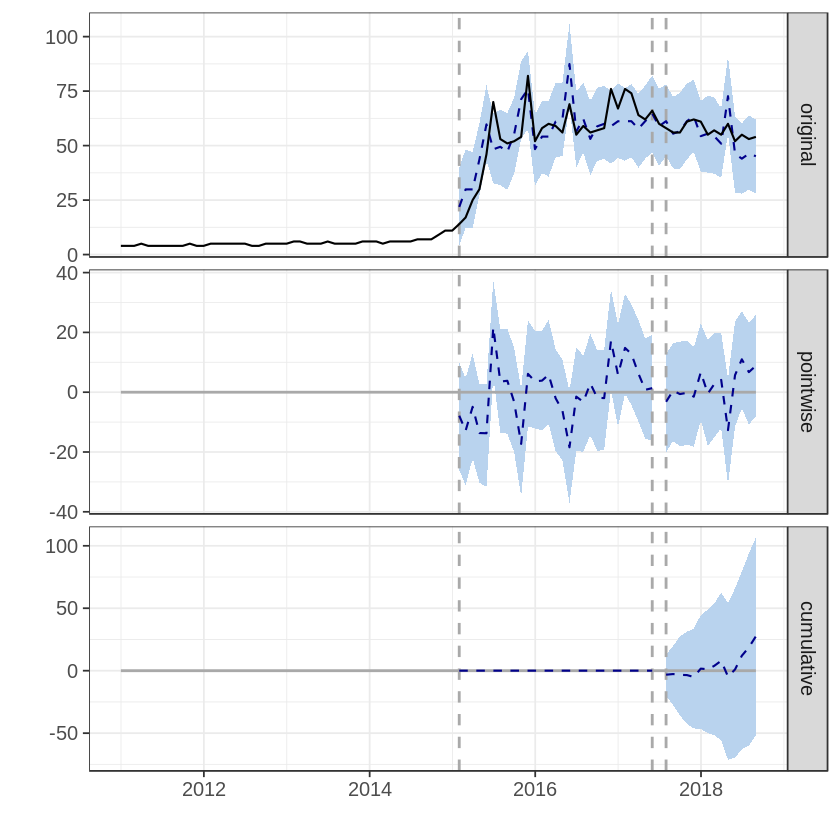

In [55]:
plot(ci)

In [56]:
summary(ci)

Posterior inference {CausalImpact}

                         Average        Cumulative    
Actual                   57             795           
Prediction (s.d.)        55 (2,9)       767 (40,4)    
95% CI                   [49, 60]       [688, 847]    
                                                      
Absolute effect (s.d.)   2 (2,9)        28 (40,4)     
95% CI                   [-3,7, 7,6]    [-51,8, 106,6]
                                                      
Relative effect (s.d.)   3,6% (5,3%)    3,6% (5,3%)   
95% CI                   [-6,7%, 14%]   [-6,7%, 14%]  

Posterior tail-area probability p:   0,25451
Posterior prob. of a causal effect:  75%

For more details, type: summary(impact, "report")



In [57]:
summary(ci, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 56,79. In the absence of an intervention, we would have expected an average response of 54,82. The 95% interval of this counterfactual prediction is [49,17, 60,48]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 1,97 with a 95% interval of [-3,70, 7,62]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 795,00. Had the intervention not taken place, we would have expected a sum of 767,45. The 95% interval of this prediction is [688,35, 846,79].

The above results are given in terms of absolute numbers. In relative terms, the response variable showed an increase of +4%. 

## Bayesian Changepoint

Using this approach, we'll try to detect on which point the pattern changes. We split the changepoint analysis into some periods:
- January 2016 to June 2017: before and after first campaign
- January 2017 to September 2018: after first and second campaign

In [16]:
df$Month <- as.POSIXct(df$Month, format='%Y-%m-%d')

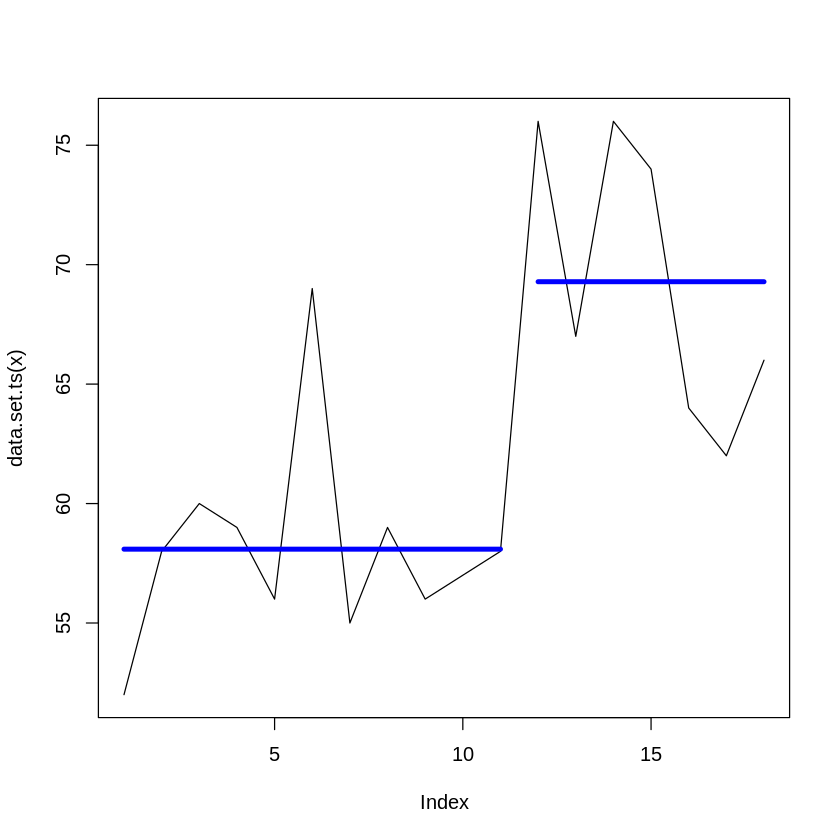

In [40]:
library("changepoint")

results <- cpt.mean(subset(df, Month >= '2016-01-01' & Month < '2017-07-01')$observed_bukalapak)
plot(results,cpt.col="blue",xlab="Index",cpt.width=4)

Changepoint: January 2018; when the first campaign started.

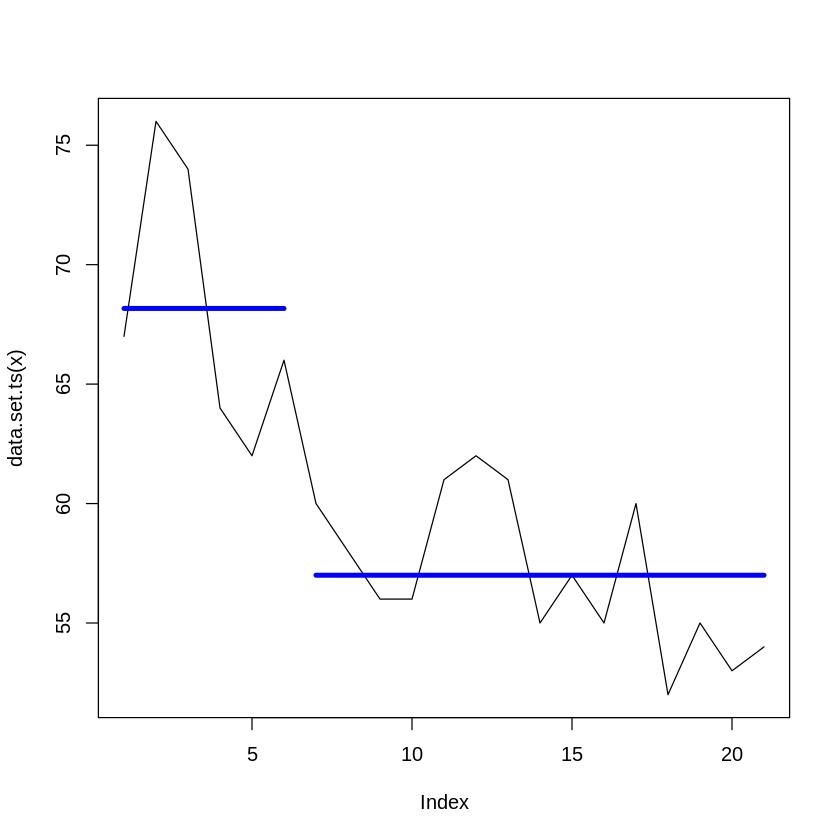

In [45]:
library("changepoint")

results <- cpt.mean(subset(df, Month >= '2017-01-01')$observed_bukalapak)
plot(results,cpt.col="blue",xlab="Index",cpt.width=4)

Changepoint: July 2018 -  a month before second campaign started; which means the second campaign didn't change the trend.

# References

- https://www.r-bloggers.com/a-simple-intro-to-bayesian-change-point-analysis/
- https://cscherrer.github.io/post/bayesian-changepoint/